
## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

#**Importing the Required library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics 

**Data Collection and analysis**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the data from csv to pandas dataframe
data = pd.read_csv('/content/drive/MyDrive/car data.csv')

In [4]:
# Checking the first five rows of data
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Checking the total no. of rows and column of the data
data.shape

(301, 9)

In [6]:
# checking all the name of the columns
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# checking the null values of the data 
data.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
# checking the total no. of categorical data
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


#**One hot encoding (Creating dummy variables for the categorical variable state)**

In [11]:
# Creating Dummy variables of Fuel_type 
data['Diesel'] = np.where(data['Fuel_Type'] =='Diesel' , 1, 0)
data['Petrol'] = np.where(data['Fuel_Type'] == 'Petrol', 2, 0)
data['CNG'] = np.where(data['Fuel_Type'] == 'CNG', 3, 0)
data.drop(columns=['Fuel_Type'], axis=1, inplace=True)

In [12]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Diesel,Petrol,CNG
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0,0,2,0
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0,0,2,0
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual,0,0,2,0
4,swift,2014,4.60,6.87,42450,Dealer,Manual,0,1,0,0


In [13]:
# Creating Dummy Variables of Seller_type
data['Dealer'] = np.where(data['Seller_Type'] == 'Dealer', 1, 0)
data['Individual'] = np.where(data['Seller_Type'] == 'Individual', 1, 0)
data.drop(columns='Seller_Type', axis=1, inplace=True)

In [14]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,Diesel,Petrol,CNG,Dealer,Individual
0,ritz,2014,3.35,5.59,27000,Manual,0,0,2,0,1,0
1,sx4,2013,4.75,9.54,43000,Manual,0,1,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Manual,0,0,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,Manual,0,0,2,0,1,0
4,swift,2014,4.60,6.87,42450,Manual,0,1,0,0,1,0


In [15]:
# Creating Dummy Variables for Transmission
data['Manual'] = np.where(data['Transmission'] == 'Manual', 1, 0)
data['Automatic'] = np.where(data['Transmission'] == 'Automatic', 1, 0)
data.drop(columns='Transmission', axis=1, inplace=True)

In [16]:
data.head(50)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Diesel,Petrol,CNG,Dealer,Individual,Manual,Automatic
0,ritz,2014,3.35,5.59,27000,0,0,2,0,1,0,1,0
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,2,0,1,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,2,0,1,0,1,0
4,swift,2014,4.60,6.87,42450,0,1,0,0,1,0,1,0
5,vitara brezza,2018,9.25,9.83,2071,0,1,0,0,1,0,1,0
6,ciaz,2015,6.75,8.12,18796,0,0,2,0,1,0,1,0
7,s cross,2015,6.50,8.61,33429,0,1,0,0,1,0,1,0
8,ciaz,2016,8.75,8.89,20273,0,1,0,0,1,0,1,0
9,ciaz,2015,7.45,8.92,42367,0,1,0,0,1,0,1,0


In [17]:
# Dropping the Car_name column because its is not important for our prediction

data.drop(columns='Car_Name', axis=1, inplace=True)

In [18]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Diesel,Petrol,CNG,Dealer,Individual,Manual,Automatic
0,2014,3.35,5.59,27000,0,0,2,0,1,0,1,0
1,2013,4.75,9.54,43000,0,1,0,0,1,0,1,0
2,2017,7.25,9.85,6900,0,0,2,0,1,0,1,0
3,2011,2.85,4.15,5200,0,0,2,0,1,0,1,0
4,2014,4.60,6.87,42450,0,1,0,0,1,0,1,0


In [19]:
# Create a dependent variables
dependent_variable = 'Selling_Price'

In [20]:
# Create a list of independent variables
independent_variables = list(set(data.columns.tolist()) - {dependent_variable})

In [21]:
independent_variables

['CNG',
 'Kms_Driven',
 'Diesel',
 'Year',
 'Dealer',
 'Owner',
 'Present_Price',
 'Petrol',
 'Automatic',
 'Manual',
 'Individual']

In [22]:
# Create a data for independent_variables

X = data[independent_variables]
X


,CNG,Kms_Driven,Diesel,Year,Dealer,Owner,Present_Price,Petrol,Automatic,Manual,Individual
0,0,27000,0,2014,1,0,5.59,2,0,1,0
1,0,43000,1,2013,1,0,9.54,0,0,1,0
2,0,6900,0,2017,1,0,9.85,2,0,1,0
3,0,5200,0,2011,1,0,4.15,2,0,1,0
4,0,42450,1,2014,1,0,6.87,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,0,33988,1,2016,1,0,11.60,0,0,1,0
297,0,60000,0,2015,1,0,5.90,2,0,1,0
298,0,87934,0,2009,1,0,11.00,2,0,1,0
299,0,9000,1,2017,1,0,12.50,0,0,1,0


In [23]:
# Create a data for dependent_variables

y = data[dependent_variable]
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

#**Splitting the dataset into train and test data**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=0)

In [25]:
X_train[:10]

,CNG,Kms_Driven,Diesel,Year,Dealer,Owner,Present_Price,Petrol,Automatic,Manual,Individual
253,0,48000,1,2014,1,0,9.90,0,0,1,0
144,0,25000,0,2014,0,0,0.99,2,0,1,1
8,0,20273,1,2016,1,0,8.89,0,0,1,0
271,0,69562,0,2009,1,0,10.00,2,0,1,0
111,0,8700,0,2016,0,0,1.50,2,0,1,1
263,0,16002,0,2016,1,0,7.70,2,0,1,0
81,0,40000,1,2015,1,0,7.85,0,0,1,0
184,0,26000,0,2008,0,1,0.75,2,0,1,1
282,0,63000,1,2014,1,0,14.00,0,0,1,0
5,0,2071,1,2018,1,0,9.83,0,0,1,0


In [26]:
X_test[:10]

,CNG,Kms_Driven,Diesel,Year,Dealer,Owner,Present_Price,Petrol,Automatic,Manual,Individual
223,0,61381,1,2015,1,0,9.400,0,0,1,0
150,0,6000,0,2011,0,0,0.826,2,0,1,1
226,0,24678,0,2015,1,0,5.700,2,0,1,0
296,0,33988,1,2016,1,0,11.600,0,0,1,0
52,0,15000,1,2017,1,0,19.770,0,1,0,0
261,0,5600,0,2016,1,0,5.970,2,0,1,0
246,0,35000,0,2012,1,0,6.790,2,0,1,0
166,0,1000,0,2016,0,0,0.550,2,0,1,1
221,0,32000,0,2013,1,0,6.790,2,1,0,0
215,0,36100,0,2012,1,0,9.400,2,0,1,0


In [27]:
# Fitting the Linear regression to the traning Data

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Now we evaluate the model

In [28]:
# Prediction on trainig data
training_pred_data = regressor.predict(X_train)


In [29]:
# R squared value
r_sq_error_train = metrics.r2_score(y_train, training_pred_data)
print('R_sq_error_train : ',r_sq_error_train)

R_sq_error_train :  0.8832052267343907


In [30]:
# Prediction on test data
test_pred_data = regressor.predict(X_test)

In [31]:
#R squared value
r_sq_error_test = metrics.r2_score(y_test,test_pred_data)
print('R_sq_error_test :',r_sq_error_test)

R_sq_error_test : 0.8732643933590882


#Visulize the actual and predicted prices

Text(0.5, 1.0, 'Actual vs Predicted value')

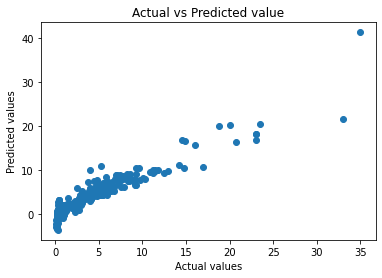

In [32]:
plt.scatter(y_train, training_pred_data)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted value')

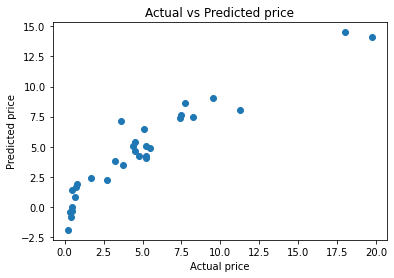

In [33]:
plt.scatter(y_test,test_pred_data)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted price')
plt.show()

#**Lasso Regression**


In [34]:
# Fitting the Lasso regression to the traning Data

lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)

Lasso()

# Now we evaluate the model

In [35]:
# Prediction on trainig data
training_pred_data = lasso_regressor.predict(X_train)


In [36]:
# R squared value
r_sq_error_train = metrics.r2_score(y_train, training_pred_data)
print('R_sq_error_train : ',r_sq_error_train)

R_sq_error_train :  0.8433840909012229


In [37]:
# Prediction on test data
test_pred_data = lasso_regressor.predict(X_test)

In [38]:
#R squared value
r_sq_error_test = metrics.r2_score(y_test,test_pred_data)
print('R_sq_error_test :',r_sq_error_test)

R_sq_error_test : 0.8229451025814395


#Visulize the actual and predicted prices

Text(0.5, 1.0, 'Actual vs Predicted value')

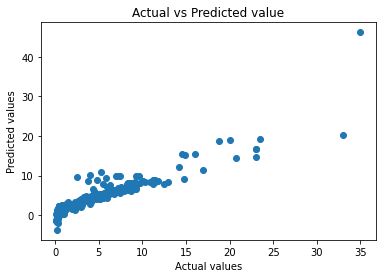

In [39]:
plt.scatter(y_train, training_pred_data)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted value')

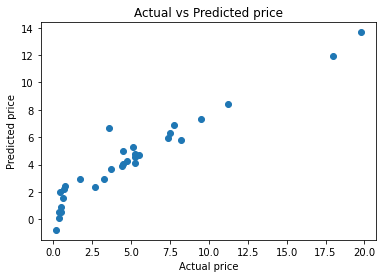

In [40]:
plt.scatter(y_test,test_pred_data)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted price')
plt.show()